In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta.values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [3]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]

In [4]:
#2 is near median of y
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 0 #success
    else:
        y[i] = 1 #failure

In [9]:
#forest = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
#forest.fit(X_train, y_train)



In [19]:
"""
n_estimators
The number of trees in the forest.
"""

'\nn_estimators\n'

In [32]:
rf_100 = RandomForestClassifier(n_estimators=100)#, max_depth=2, random_state=0)
rf_100.fit(X_train, y_train)
y_pred_100 = rf_100.predict(X_test)
scores_100 = cross_val_score(rf_100, X_test, y_test, cv=10).mean()
r_100 =recall_score(y_test, y_pred_100)  
p_100 =precision_score(y_test, y_pred_100)  
f1_100 =f1_score(y_test, y_pred_100)

In [33]:
rf_200 = RandomForestClassifier(n_estimators=200)
rf_200.fit(X_train, y_train)
y_pred_200 = rf_200.predict(X_test)
scores_200 = cross_val_score(rf_200, X_test, y_test, cv=10).mean()
r_200 =recall_score(y_test, y_pred_200)  
p_200 =precision_score(y_test, y_pred_200)  
f1_200 =f1_score(y_test, y_pred_200)

In [34]:
rf_300 = RandomForestClassifier(n_estimators=300)
rf_300.fit(X_train, y_train)
y_pred_300 = rf_300.predict(X_test)
scores_300 = cross_val_score(rf_300, X_test, y_test, cv=10).mean()
r_300 =recall_score(y_test, y_pred_300)  
p_300 =precision_score(y_test, y_pred_300)  
f1_300 =f1_score(y_test, y_pred_300)

In [35]:
rf_400 = RandomForestClassifier(n_estimators=400)
rf_400.fit(X_train, y_train)
y_pred_400 = rf_400.predict(X_test)
scores_400 = cross_val_score(rf_400, X_test, y_test, cv=10).mean()
r_400 =recall_score(y_test, y_pred_400)  
p_400 =precision_score(y_test, y_pred_400)  
f1_400 =f1_score(y_test, y_pred_400)

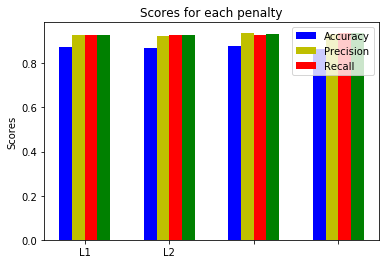

In [37]:
N = 4

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_100,scores_200,scores_300,scores_400]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_100,p_200,p_300,p_400]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_100,r_200,r_300,r_400]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_100,f1_200,f1_300,f1_400]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('L1', 'L2'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Precision', 'Recall'))

plt.show()

n_estimators=300 has highest accuracy 0.8786069235555869

In [45]:
rf_100 = RandomForestClassifier(n_estimators=100, max_depth = 100)#, max_depth=2, random_state=0)
rf_100.fit(X_train, y_train)
y_pred_100 = rf_100.predict(X_test)
scores_100 = cross_val_score(rf_100, X_test, y_test, cv=10).mean()
#r_100 =recall_score(y_test, y_pred_100)  
#p_100 =precision_score(y_test, y_pred_100)  
#f1_100 =f1_score(y_test, y_pred_100)
print(scores_100)

0.8614575628426848


0.8649313749662453


In [ ]:
"""
Penalty param
"""
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
r =recall_score(y_test, y_pred)  
p =precision_score(y_test, y_pred)  
f1 =f1_score(y_test, y_pred)  

Feature ranking:
1. feature 2 (0.456730)
2. feature 3 (0.167613)
3. feature 1 (0.115635)
4. feature 5 (0.114696)
5. feature 0 (0.051421)
6. feature 11 (0.035770)
7. feature 14 (0.028700)
8. feature 4 (0.019778)
9. feature 15 (0.002522)
10. feature 17 (0.002329)
11. feature 10 (0.001756)
12. feature 12 (0.001352)
13. feature 7 (0.000832)
14. feature 13 (0.000527)
15. feature 16 (0.000272)
16. feature 8 (0.000065)
17. feature 6 (0.000000)
18. feature 9 (0.000000)


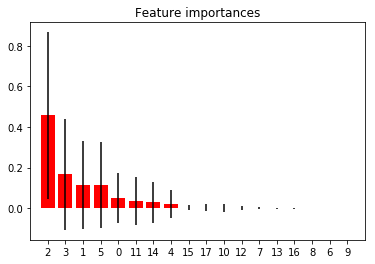

In [14]:
# Build a forest and compute the feature importances

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
y_test[0:10]

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:

forest = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)

scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='precision')
print (scores)
print ("Average score is " + str(scores.mean()))